In [2]:
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import matplotlib.dates as mdates
import pandas as pd
import os

In [3]:
path = "/media/scilab/disk_ranjan/works/westcoast_adcp1/backscatternew/8process/lancos_filter/intraseasonal/"
files = sorted([f for f in os.listdir(path) if f.endswith(".nc")])
ds = [xr.open_dataset(path+files[i]) for i in range(7)]

In [11]:
customticks = np.arange(0,141,40)
customlabel = np.arange(0,141,40)
names = ["Okha",'Mumbai','Jaigarh',"Goa","Udupi","Kollam","Kanyakumari"]
figlab = ["a)","b)","c)","d)","e)","f)","g)"]

# intra seasonal

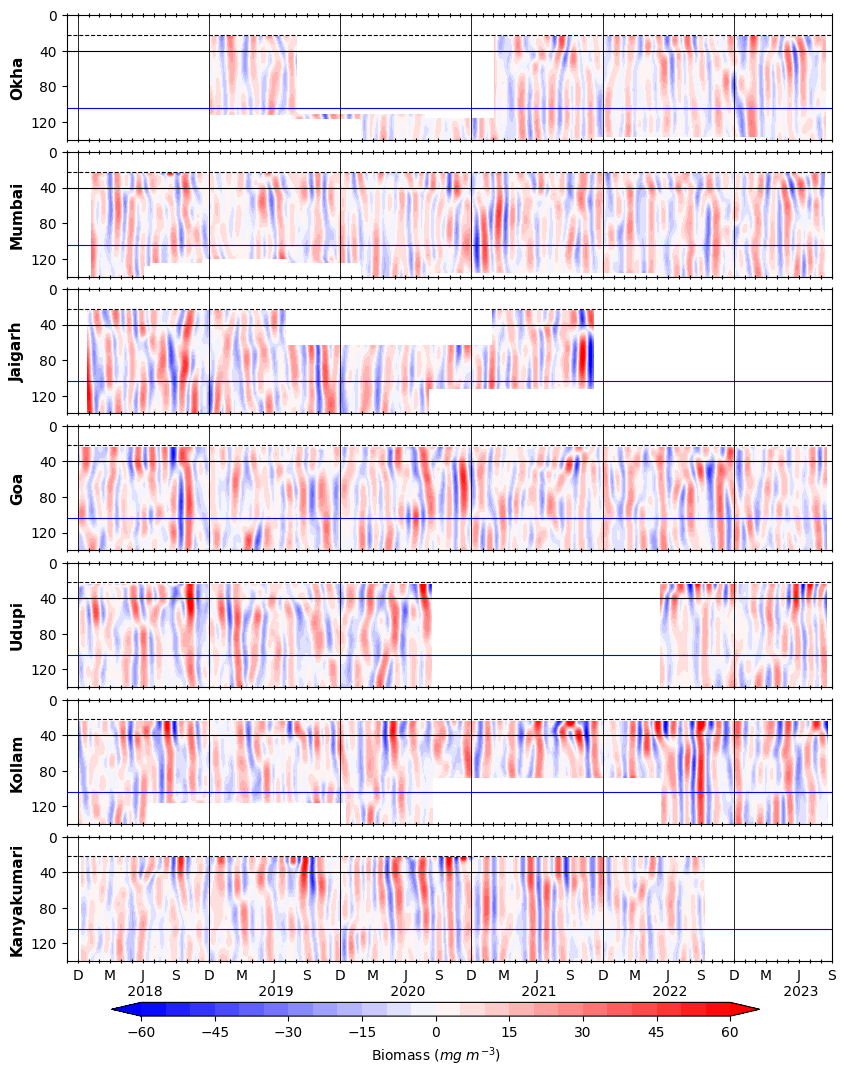

In [147]:
fig, ax = plt.subplots(nrows=7,ncols=1,figsize=(9,11),sharex=True)
plt.subplots_adjust(wspace=0.04,left=0.09,bottom=0.1,top=0.96,hspace=0.1,right = 0.94)

for i in range(7):
    figcol = ax[i].contourf(ds[i].AX006,ds[i].DEPTH1[6:],ds[i].INTSN[:,6:,0,0].T,cmap="bwr",levels=np.arange(-60,61,5),extend="both")
    dsm = ds[i].resample(AX006='ME').mean()
    tklb = []
    for t in dsm.AX006.values:
        monlb = str(pd.to_datetime(t).month_name()[0:3])
        if monlb =="Jun":
            yrlb = str(pd.to_datetime(t).year)
            tklb.append(f'{monlb[0]}\n {yrlb}')
        elif monlb == "Sep":
            tklb.append(f'{monlb[0]}')
        elif monlb == "Dec":
            tklb.append(f'{monlb[0]}')
            ax[i].axvline(t,color='k',linewidth=0.6)
        elif monlb == "Mar":
            tklb.append(f'{monlb[0]}')
        else: 
            tklb.append("")
    ax[0].set_xticks(dsm.AX006,tklb)    
    ax[0].set_xlim(xmin=dsm.AX006[1],xmax=dsm.AX006[-4])
    ax[i].axhline(22,color='k',linewidth=0.8,linestyle='--')
    ax[i].axhline(40,color='k',linewidth=0.8)
    ax[i].axhline(104,color='b',linewidth=0.8)
    ax[i].set_ylim(ymin=0,ymax=140)
    ax[i].set_yticks(customticks)
    ax[i].set_yticklabels(customlabel)
    ax[i].set_ylabel(names[i],fontsize=11,fontweight='bold')
    ax[i].tick_params(axis='x', which='both', direction='inout', right=True, top=True)

    ax[i].invert_yaxis()
    
cax = fig.add_axes([0.14, 0.05, 0.72,0.0125])
cbar = fig.colorbar(figcol, cax=cax, orientation="horizontal")
cbar.ax.tick_params(labelsize=10)
cbar.ax.set_xlabel(xlabel="Biomass ($mg \\ m^{-3})$")

plt.savefig(path+"intraseasonal_30_90_181.jpeg",dpi=400)
plt.savefig("/media/scilab/disk_ranjan/works/backscatter_wc/figures/intraseasonal_30_90_181.jpeg",dpi=400)



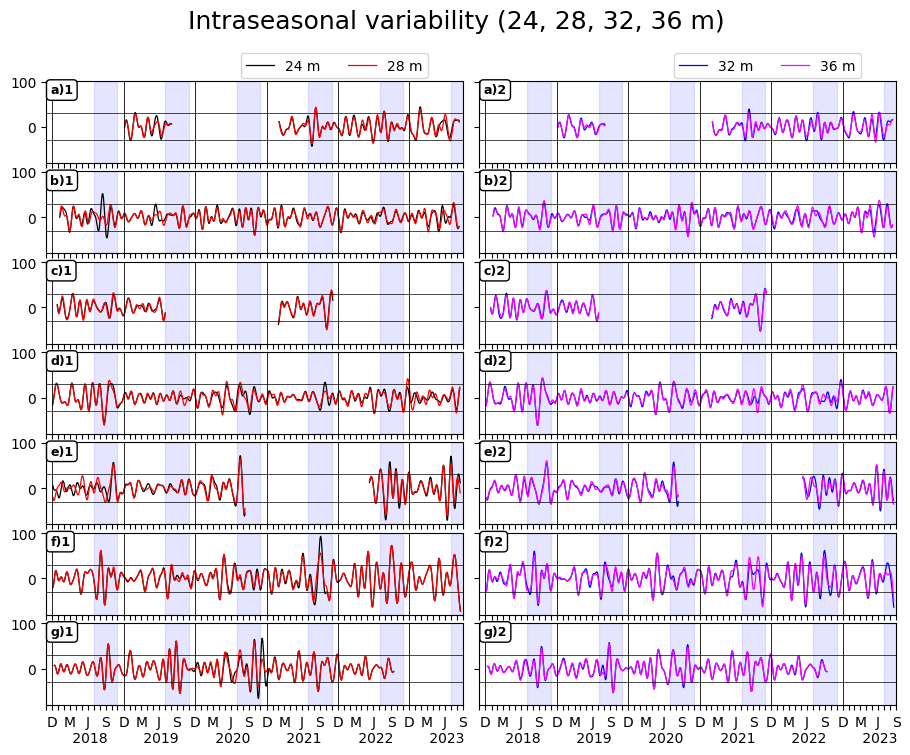

In [49]:
fig, ax = plt.subplots(nrows=7,ncols=2,figsize=(10,12),sharex=True,sharey=True)

plt.subplots_adjust(wspace=0.04,left=0.09,bottom=0.4,top=0.92,hspace=0.1,right = 0.94)

for i in range(7):
    figcol = ax[i,0].plot(ds[i].AX006,ds[i].INTSN[:,6,0,0].T,color='k',linewidth=0.9,label="24 m")
    ax[i,0].plot(ds[i].AX006,ds[i].INTSN[:,7,0,0].T,color='r',linewidth=0.9,label="28 m")

    ax[i,1].plot(ds[i].AX006,ds[i].INTSN[:,8,0,0].T,color='b',linewidth=0.9,label="32 m")
    ax[i,1].plot(ds[i].AX006,ds[i].INTSN[:,9,0,0].T,color='magenta',linewidth=0.9,label="36 m")
    
    ax[i,0].text(0.010, 0.97, figlab[i] +"1" ,transform=ax[i,0].transAxes, fontsize=9, va='top',
            ha='left',color='black',fontweight="bold",bbox=dict(facecolor='white', edgecolor='black', boxstyle='round', alpha=1))    
    ax[i,1].text(0.010, 0.97, figlab[i] +"2" ,transform=ax[i,1].transAxes, fontsize=9, va='top',
            ha='left',color='black',fontweight="bold",bbox=dict(facecolor='white', edgecolor='black', boxstyle='round', alpha=1))    
    
    dsm = ds[i].resample(AX006='ME').mean()
    tklb = []
    for t in dsm.AX006.values:
        monlb = str(pd.to_datetime(t).month_name()[0:3])
        if monlb =="Jun":
            yrlb = str(pd.to_datetime(t).year)
            tklb.append(f'{monlb[0]}\n {yrlb}')
        elif monlb == "Sep":
            tklb.append(f'{monlb[0]}')
        elif monlb == "Dec":
            tklb.append(f'{monlb[0]}')
            ax[i,0].axvline(t,color='k',linewidth=0.6)
            ax[i,1].axvline(t,color='k',linewidth=0.6)
        elif monlb == "Mar":
            tklb.append(f'{monlb[0]}')
        else: 
            tklb.append("")
    start_year = ds[i].AX006.dt.year[0].item()
    end_year = ds[i].AX006.dt.year[-1].item()

    # Loop through each year and add shading for August to November
    for year in range(start_year, end_year + 1):
        ax[i,0].axvspan(f'{year}-08-01', f'{year}-11-30', color='blue', alpha=0.1)
        ax[i,1].axvspan(f'{year}-08-01', f'{year}-11-30', color='blue', alpha=0.1)
    ax[i,0].axhline(30,linewidth=0.5,color='k')
    ax[i,0].axhline(-30,linewidth=0.5,color='k')
    ax[i,1].axhline(30,linewidth=0.5,color='k')
    ax[i,1].axhline(-30,linewidth=0.5,color='k')
    
ax[0,0].set_xticks(dsm.AX006,tklb)    
ax[0,0].set_xlim(xmin=dsm.AX006[1],xmax=dsm.AX006[-4])
ax[0,1].set_xticks(dsm.AX006,tklb)    
ax[0,1].set_xlim(xmin=dsm.AX006[1],xmax=dsm.AX006[-4])

ax[0,0].legend(bbox_to_anchor=(0.45, 0.95),ncol=2)
ax[0,1].legend(bbox_to_anchor=(0.45, 0.95),ncol=2)

fig.suptitle("Intraseasonal variability (24, 28, 32, 36 m)",fontsize=18)

plt.savefig(path+"intraseasonal_24_28_32_36m.png",dpi=400)
plt.savefig("/media/scilab/disk_ranjan/works/backscatter_wc/figures/intraseasonal_24_28_32_36m.png",dpi=400)


# intra annual 

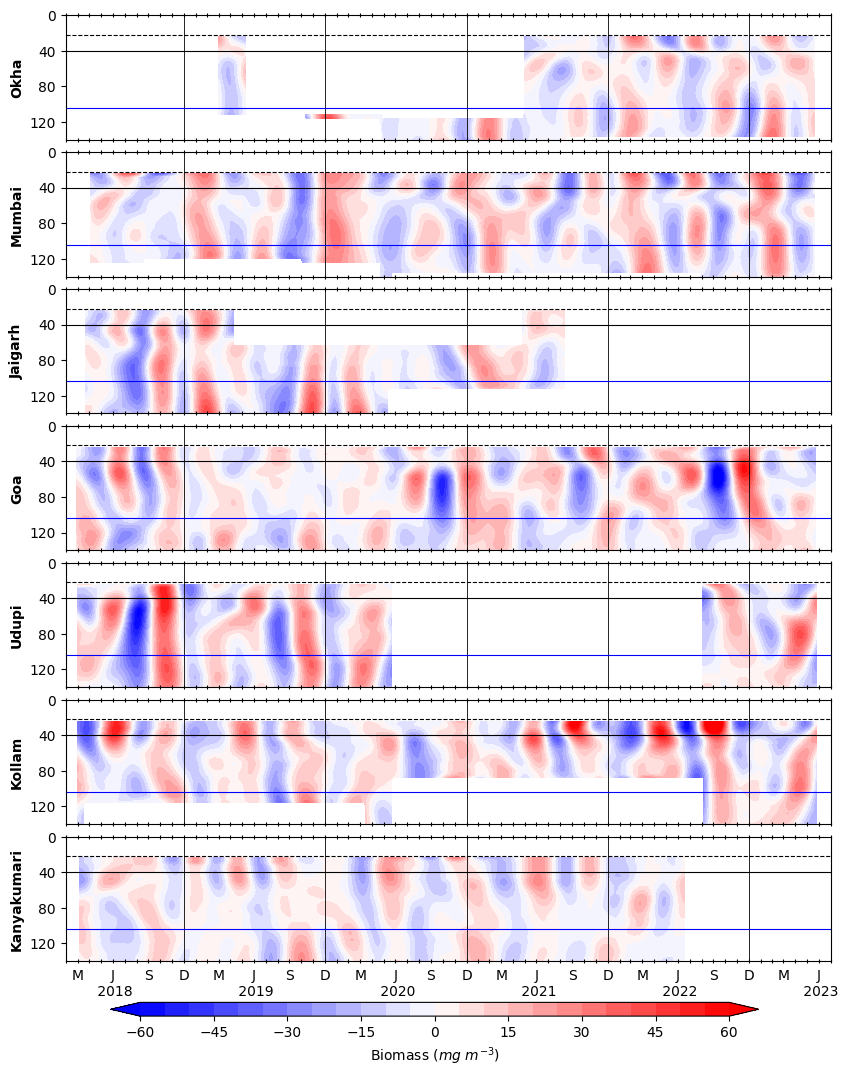

In [160]:
fig, ax = plt.subplots(nrows=7,ncols=1,figsize=(9,11),sharex=True)

plt.subplots_adjust(wspace=0.04,left=0.09,bottom=0.1,top=0.96,hspace=0.1,right = 0.94)

for i in range(7):
    figcol = ax[i].contourf(ds[i].AX006[6:-6],ds[i].DEPTH1[6:],ds[i].INTAN[6:-6,6:,0,0].T,cmap="bwr",levels=np.arange(-60,61,5),extend="both")

    dsm = ds[i].resample(AX006='ME').mean()
    tklb = []
    for t in dsm.AX006.values:
        monlb = str(pd.to_datetime(t).month_name()[0:3])
        if monlb =="Jun":
            yrlb = str(pd.to_datetime(t).year)
            tklb.append(f'{monlb[0]}\n {yrlb}')
        elif monlb == "Sep":
            tklb.append(f'{monlb[0]}')
        elif monlb == "Dec":
            tklb.append(f'{monlb[0]}')
            ax[i].axvline(t,color='k',linewidth=0.6)
        elif monlb == "Mar":
            tklb.append(f'{monlb[0]}')
        else: 
            tklb.append("")
    ax[0].set_xticks(dsm.AX006,tklb)    
    ax[0].set_xlim(xmin=dsm.AX006[4],xmax=dsm.AX006[-6])

    ax[i].set_ylim(ymin=0,ymax=140)
    ax[i].set_yticks(customticks)
    ax[i].set_yticklabels(customlabel)
    ax[i].axhline(22,color='k',linewidth=0.8,linestyle='--')
    ax[i].axhline(40,color='k',linewidth=0.8)
    ax[i].axhline(104,color='b',linewidth=0.8)
    ax[i].set_ylabel(names[i],fontsize=10,fontweight='bold')
    ax[i].tick_params(axis='x', which='both', direction='inout', right=True, top=True)

    ax[i].invert_yaxis()
    
cax = fig.add_axes([0.14, 0.05, 0.72,0.0125])
cbar = fig.colorbar(figcol, cax=cax, orientation="horizontal")
cbar.ax.tick_params(labelsize=10)
cbar.ax.set_xlabel(xlabel="Biomass ($mg \\ m^{-3})$")

plt.savefig(path+"intraannual_100_250_351.jpeg",dpi=400)
plt.savefig("/media/scilab/disk_ranjan/works/backscatter_wc/figures/intraannual_100_250_351.jpeg",dpi=400)


# annual 

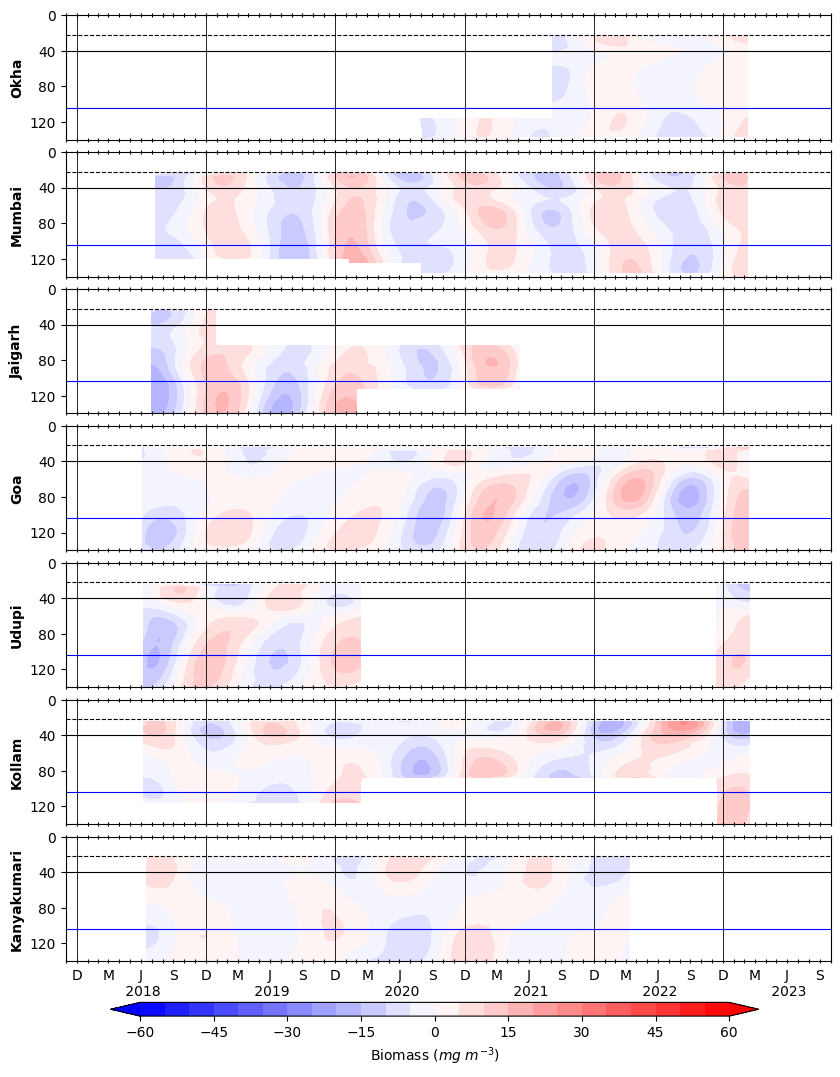

In [7]:
fig, ax = plt.subplots(nrows=7,ncols=1,figsize=(9,11),sharex=True)

plt.subplots_adjust(wspace=0.04,left=0.09,bottom=0.1,top=0.96,hspace=0.1,right = 0.94)


for i in range(7):
    figcol = ax[i].contourf(ds[i].AX006,ds[i].DEPTH1[6:],ds[i].ANNUAL[:,6:,0,0].T,cmap="bwr",levels=np.arange(-60,61,5),extend="both")
    dsm = ds[i].resample(AX006='ME').mean()
    tklb = []
    for t in dsm.AX006.values:
        monlb = str(pd.to_datetime(t).month_name()[0:3])
        if monlb =="Jun":
            yrlb = str(pd.to_datetime(t).year)
            tklb.append(f'{monlb[0]}\n {yrlb}')
        elif monlb == "Sep":
            tklb.append(f'{monlb[0]}')
        elif monlb == "Dec":
            tklb.append(f'{monlb[0]}')
            ax[i].axvline(t,color='k',linewidth=0.6)
        elif monlb == "Mar":
            tklb.append(f'{monlb[0]}')
        else: 
            tklb.append("")
    ax[0].set_xticks(dsm.AX006,tklb)    
    ax[0].set_xlim(xmin=dsm.AX006[1],xmax=dsm.AX006[-3])

    ax[i].set_ylim(ymin=10,ymax=140)
    ax[i].set_yticks(customticks)
    ax[i].set_yticklabels(customlabel)
    ax[i].axhline(22,color='k',linewidth=0.8,linestyle='--')
    ax[i].axhline(40,color='k',linewidth=0.8)
    ax[i].axhline(104,color='b',linewidth=0.8)
    ax[i].set_ylabel(names[i],fontsize=10,fontweight='bold')
    ax[i].tick_params(axis='x', which='both', direction='inout', right=True, top=True)

    ax[i].invert_yaxis()
       
cax = fig.add_axes([0.14, 0.05, 0.72,0.0125])
cbar = fig.colorbar(figcol, cax=cax, orientation="horizontal")
cbar.ax.tick_params(labelsize=10)
cbar.ax.set_xlabel(xlabel="Biomass ($mg \\ m^{-3})$")

plt.savefig(path+"annual_300_400_451.jpeg",dpi=400)
plt.savefig("/media/scilab/disk_ranjan/works/backscatter_wc/figures/annual_300_400_451.jpeg",dpi=400)

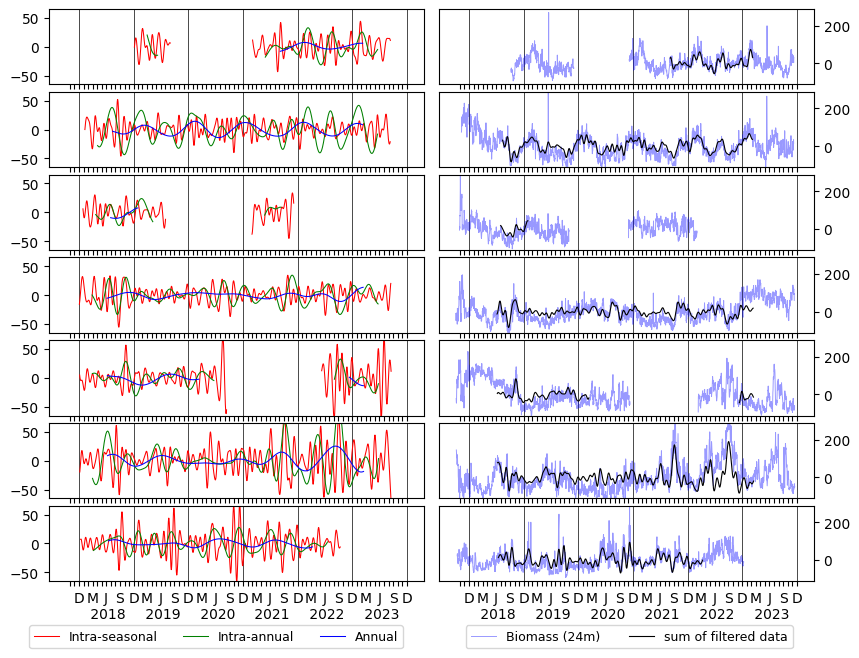

In [159]:
fig, ax = plt.subplots(nrows=7,ncols=2,figsize=(9,11),sharex=True)

plt.subplots_adjust(wspace=0.04,left=0.09,bottom=0.4,top=0.92,hspace=0.1,right = 0.94)

for i in range(7):
    dsm = ds[i].resample(AX006='ME').mean()
    tklb = []
    for t in dsm.AX006.values:
        monlb = str(pd.to_datetime(t).month_name()[0:3])
        if monlb =="Jun":
            yrlb = str(pd.to_datetime(t).year)
            tklb.append(f'{monlb[0]}\n {yrlb}')
        elif monlb == "Sep":
            tklb.append(f'{monlb[0]}')
        elif monlb == "Dec":
            tklb.append(f'{monlb[0]}')
            ax[i,0].axvline(t,color='k',linewidth=0.5)
            ax[i,1].axvline(t,color='k',linewidth=0.5)
        elif monlb == "Mar":
            tklb.append(f'{monlb[0]}')
        else: 
            tklb.append("")
    ax[i,0].plot(ds[i].AX006,ds[i].INTSN[:,6,0,0].T,color='red',linewidth=0.75,label="Intra-seasonal")
    ax[i,0].plot(ds[i].AX006,ds[i].INTAN[:,6,0,0].T,color='green',linewidth=0.75,label="Intra-annual")
    ax[i,0].plot(ds[i].AX006,ds[i].ANNUAL[:,6,0,0].T,color='b',linewidth=0.75,label="Annual")
    
    ax[i,1].plot(ds[i].AX006,ds[i].BMD[:,6,0,0].T,color='blue',linewidth=0.7,label="Biomass (24m) ",alpha=0.4)
    ax[i,1].plot(ds[i].AX006,ds[i].INTSN[:,6,0,0].T+ds[i].INTAN[:,6,0,0].T+ds[i].ANNUAL[:,6,0,0].T,color='black',linewidth=0.8,label="sum of filtered data")
    ax[0,0].set_ylim(ymin=-65,ymax=65)
    ax[i,1].tick_params(axis='y', which='both', left=False, right=True, labelleft=False,labelright=True)

    ax[i,0].sharey(ax[0,0])
    ax[i,1].sharey(ax[0,1])
    
ax[0,0].set_xticks(dsm.AX006,tklb)    
ax[6,0].legend(bbox_to_anchor=(0.961, -0.5),ncol=3,fontsize=9)
ax[6,1].legend(bbox_to_anchor=(0.961, -0.5),ncol=2,fontsize=9)

# for currents in the intraseasonal band

In [14]:
path = "/media/scilab/disk_ranjan/works/westcoast_adcp1/backscatternew/8process/lancos_filter/intraseasonal_currents/"
files = sorted([f for f in os.listdir(path) if f.endswith(".nc")])
ds = [xr.open_dataset(path+files[i]) for i in range(7)]

## intraseasonal

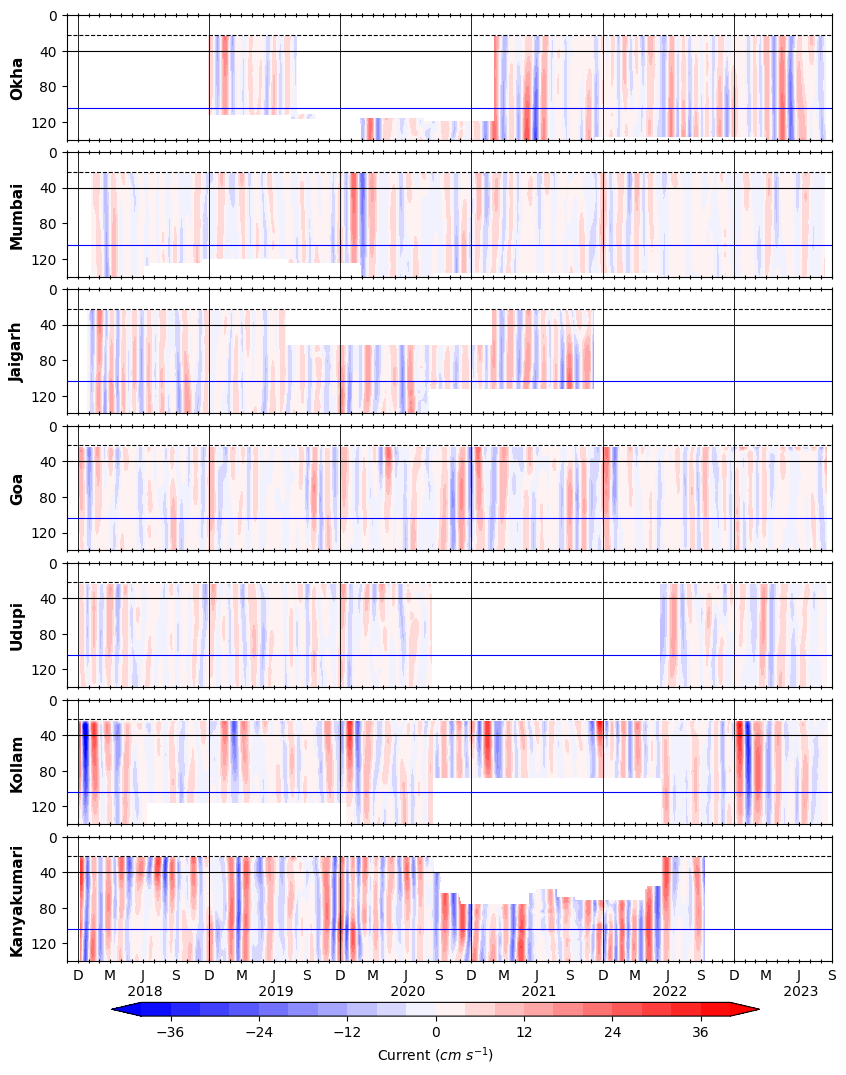

In [24]:
fig, ax = plt.subplots(nrows=7,ncols=1,figsize=(9,11),sharex=True)
plt.subplots_adjust(wspace=0.04,left=0.09,bottom=0.1,top=0.96,hspace=0.1,right = 0.94)

for i in range(7):
    figcol = ax[i].contourf(ds[i].AX006,ds[i].DEPTH1[6:],ds[i].INTSN[:,6:,0,0].T,cmap="bwr",levels=np.arange(-40,41,4),extend="both")
    dsm = ds[i].resample(AX006='ME').mean()
    tklb = []
    for t in dsm.AX006.values:
        monlb = str(pd.to_datetime(t).month_name()[0:3])
        if monlb =="Jun":
            yrlb = str(pd.to_datetime(t).year)
            tklb.append(f'{monlb[0]}\n {yrlb}')
        elif monlb == "Sep":
            tklb.append(f'{monlb[0]}')
        elif monlb == "Dec":
            tklb.append(f'{monlb[0]}')
            ax[i].axvline(t,color='k',linewidth=0.6)
        elif monlb == "Mar":
            tklb.append(f'{monlb[0]}')
        else: 
            tklb.append("")
    ax[0].set_xticks(dsm.AX006,tklb)    
    ax[0].set_xlim(xmin=dsm.AX006[1],xmax=dsm.AX006[-4])
    ax[i].axhline(22,color='k',linewidth=0.8,linestyle='--')
    ax[i].axhline(40,color='k',linewidth=0.8)
    ax[i].axhline(104,color='b',linewidth=0.8)
    ax[i].set_ylim(ymin=0,ymax=140)
    ax[i].set_yticks(customticks)
    ax[i].set_yticklabels(customlabel)
    ax[i].set_ylabel(names[i],fontsize=11,fontweight='bold')
    ax[i].tick_params(axis='x', which='both', direction='inout', right=True, top=True)

    ax[i].invert_yaxis()
    
cax = fig.add_axes([0.14, 0.05, 0.72,0.0125])
cbar = fig.colorbar(figcol, cax=cax, orientation="horizontal")
cbar.ax.tick_params(labelsize=10)
cbar.ax.set_xlabel(xlabel="Current ($cm \\ s^{-1})$")

plt.savefig(path+"intraseasonal_30_90_181_currents.jpeg",dpi=400)
plt.savefig("/media/scilab/disk_ranjan/works/backscatter_wc/figures/intraseasonal_30_90_181_currents.jpeg",dpi=400)



# intra annual

Text(0.5, 0, 'Current ($cm \\ s^{-})$')

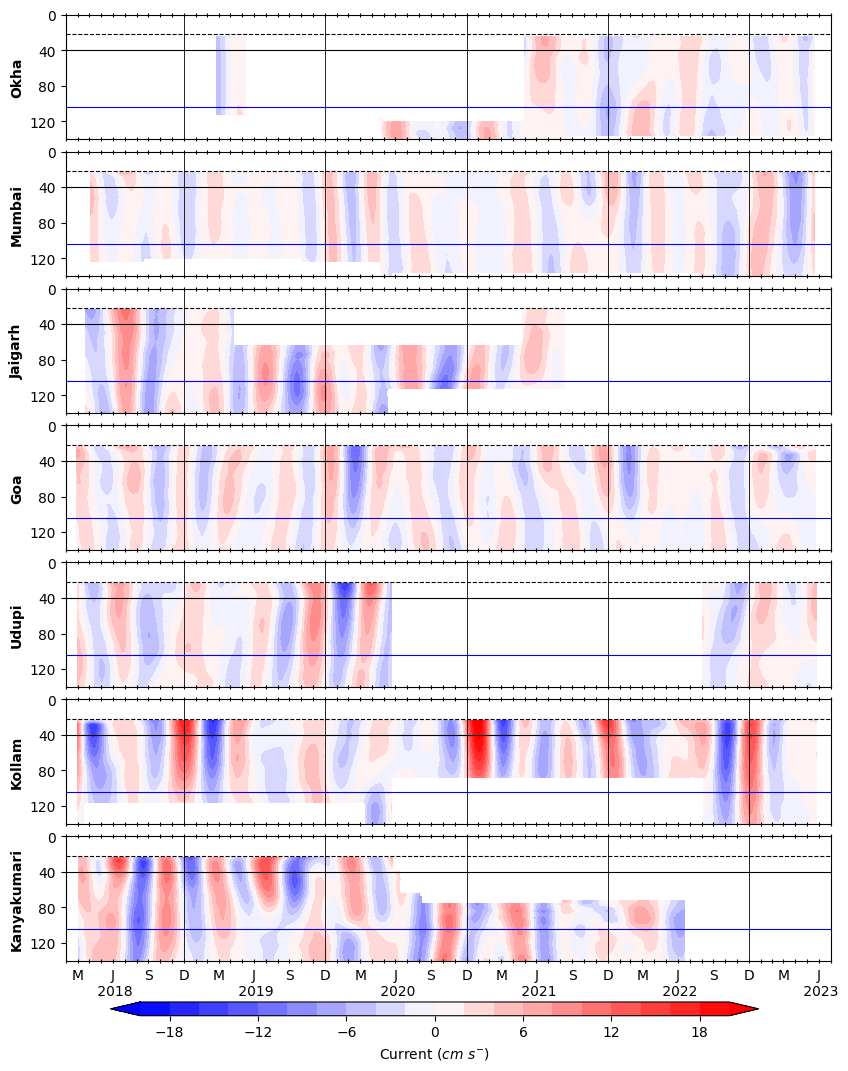

In [22]:
fig, ax = plt.subplots(nrows=7,ncols=1,figsize=(9,11),sharex=True)

plt.subplots_adjust(wspace=0.04,left=0.09,bottom=0.1,top=0.96,hspace=0.1,right = 0.94)

for i in range(7):
    figcol = ax[i].contourf(ds[i].AX006[6:-6],ds[i].DEPTH1[6:],ds[i].INTAN[6:-6,6:,0,0].T,cmap="bwr",levels=np.arange(-20,21,2),extend="both")

    dsm = ds[i].resample(AX006='ME').mean()
    tklb = []
    for t in dsm.AX006.values:
        monlb = str(pd.to_datetime(t).month_name()[0:3])
        if monlb =="Jun":
            yrlb = str(pd.to_datetime(t).year)
            tklb.append(f'{monlb[0]}\n {yrlb}')
        elif monlb == "Sep":
            tklb.append(f'{monlb[0]}')
        elif monlb == "Dec":
            tklb.append(f'{monlb[0]}')
            ax[i].axvline(t,color='k',linewidth=0.6)
        elif monlb == "Mar":
            tklb.append(f'{monlb[0]}')
        else: 
            tklb.append("")
    ax[0].set_xticks(dsm.AX006,tklb)    
    ax[0].set_xlim(xmin=dsm.AX006[4],xmax=dsm.AX006[-6])

    ax[i].set_ylim(ymin=0,ymax=140)
    ax[i].set_yticks(customticks)
    ax[i].set_yticklabels(customlabel)
    ax[i].axhline(22,color='k',linewidth=0.8,linestyle='--')
    ax[i].axhline(40,color='k',linewidth=0.8)
    ax[i].axhline(104,color='b',linewidth=0.8)
    ax[i].set_ylabel(names[i],fontsize=10,fontweight='bold')
    ax[i].tick_params(axis='x', which='both', direction='inout', right=True, top=True)

    ax[i].invert_yaxis()
    
cax = fig.add_axes([0.14, 0.05, 0.72,0.0125])
cbar = fig.colorbar(figcol, cax=cax, orientation="horizontal")
cbar.ax.tick_params(labelsize=10)
cbar.ax.set_xlabel(xlabel="Current ($cm \\ s^{-})$")

#plt.savefig(path+"intraannual_100_250_351_currents.jpeg",dpi=400)
#plt.savefig("/media/scilab/disk_ranjan/works/backscatter_wc/figures/intraannual_100_250_351_currents.jpeg",dpi=400)


## annual 

Text(0.5, 0, 'Current ($cm \\ s^{-})$')

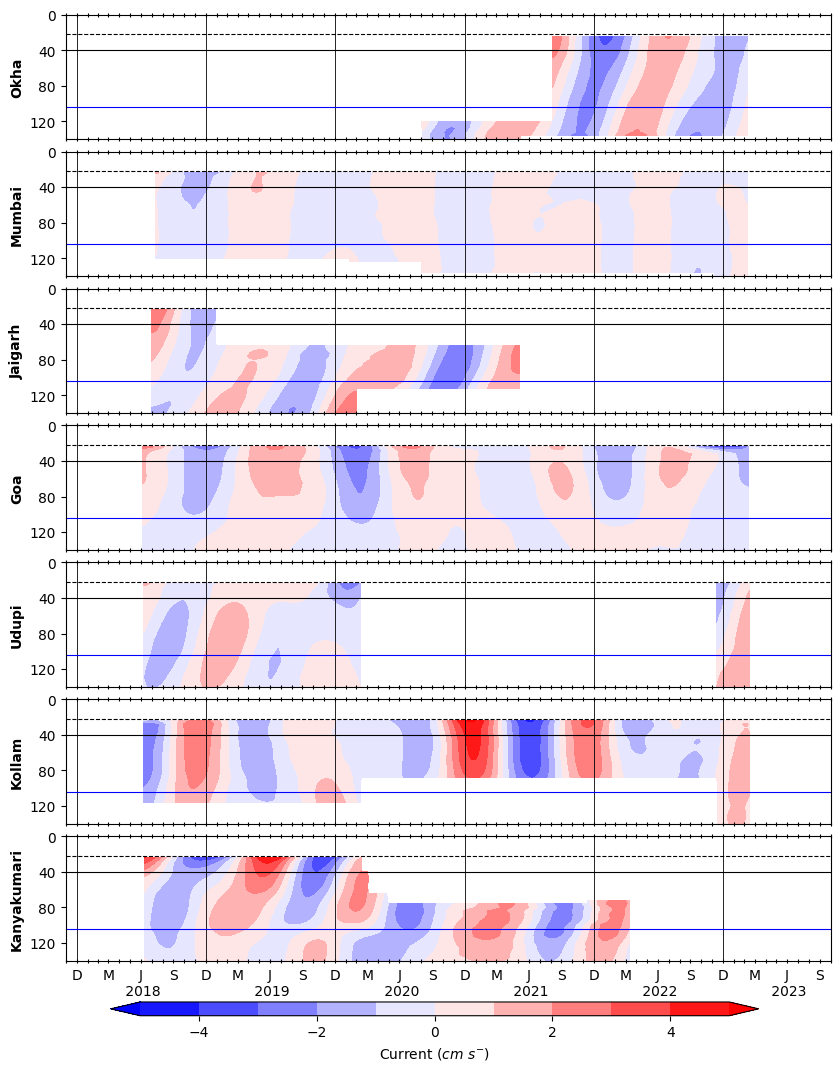

In [20]:
fig, ax = plt.subplots(nrows=7,ncols=1,figsize=(9,11),sharex=True)

plt.subplots_adjust(wspace=0.04,left=0.09,bottom=0.1,top=0.96,hspace=0.1,right = 0.94)


for i in range(7):
    figcol = ax[i].contourf(ds[i].AX006,ds[i].DEPTH1[6:],ds[i].ANNUAL[:,6:,0,0].T,cmap="bwr",levels=np.arange(-5,6,1),extend="both")
    dsm = ds[i].resample(AX006='ME').mean()
    tklb = []
    for t in dsm.AX006.values:
        monlb = str(pd.to_datetime(t).month_name()[0:3])
        if monlb =="Jun":
            yrlb = str(pd.to_datetime(t).year)
            tklb.append(f'{monlb[0]}\n {yrlb}')
        elif monlb == "Sep":
            tklb.append(f'{monlb[0]}')
        elif monlb == "Dec":
            tklb.append(f'{monlb[0]}')
            ax[i].axvline(t,color='k',linewidth=0.6)
        elif monlb == "Mar":
            tklb.append(f'{monlb[0]}')
        else: 
            tklb.append("")
    ax[0].set_xticks(dsm.AX006,tklb)    
    ax[0].set_xlim(xmin=dsm.AX006[1],xmax=dsm.AX006[-3])

    ax[i].set_ylim(ymin=10,ymax=140)
    ax[i].set_yticks(customticks)
    ax[i].set_yticklabels(customlabel)
    ax[i].axhline(22,color='k',linewidth=0.8,linestyle='--')
    ax[i].axhline(40,color='k',linewidth=0.8)
    ax[i].axhline(104,color='b',linewidth=0.8)
    ax[i].set_ylabel(names[i],fontsize=10,fontweight='bold')
    ax[i].tick_params(axis='x', which='both', direction='inout', right=True, top=True)

    ax[i].invert_yaxis()
       
cax = fig.add_axes([0.14, 0.05, 0.72,0.0125])
cbar = fig.colorbar(figcol, cax=cax, orientation="horizontal")
cbar.ax.tick_params(labelsize=10)
cbar.ax.set_xlabel(xlabel="Current ($cm \\ s^{-})$")

#plt.savefig(path+"annual_300_400_451_currents.jpeg",dpi=400)
#plt.savefig("/media/scilab/disk_ranjan/works/backscatter_wc/figures/annual_300_400_451_currents.jpeg",dpi=400)